Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*Jenish*</p>| <p style="text-align: left">*Thapa*</p> | *k12137169* |
| <p style="text-align: left">*Tara*</p>| <p style="text-align: left">*Jadidi*</p> | *K12230863* |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2023)</h2><h1 style="text-align: center;color:rgb(0,120,170)">Assignment 1: Document Classification with LSTM and Transformers</h1>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-framework"><li style="font-size:large;font-weight:bold">Task A: PyTorch Framework for Document Classification (5 points)</li></a>
    <a href="#section-classification-rnn"><li style="font-size:large;font-weight:bold">Task B: Document Classification with LSTM (15 points)</li></a>
    <a href="#section-classification-attention"><li style="font-size:large;font-weight:bold">Task C: Document Classification with Attention (15 points)</li></a>
    <a href="#section-classification-transformer"><li style="font-size:large;font-weight:bold">Task D: Document Classification with Transformer (15 points)</li></a>
    <a href="#section-interpretation"><li style="font-size:large;font-weight:bold">Task E: Interpreting Attention Weights (3 extra points)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective
The aim of this assignment is to implement a document/sentence classification model with PyTorch, particularly by using Long Short-Term Memory (LSTM), Attention networks, and Transformers. The assignment has **50 points** in total.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments. Try to provide the solutions in a clear, and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the author(s) know shall you find any error or unclarity in the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python`, `PyTorch` and, `transformers`. Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f18654892601870996f2494cf3/48245/7814719893537218646/nlpwdl2023_data.zip).

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.label.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div style="background-color:rgb(224, 243, 255)">

### Publishing Experiments Results

In all experiments of this assignment, use any experiment monitoring tool like [`TensorBoard`](https://www.tensorflow.org/tensorboard), [`wandb`](https://wandb.ai) to log and store all useful information about the training and evaluation of the models. Feel free to log any important aspect in particular the changes in evaluation results on validation, in training loss, and in learning rate.

After finalizing all experiments and cleaning any unnecessary experiment, **provide the URL to the results monitoring page in the cell below**.

For instance if using [`TensorBoard.dev`](https://tensorboard.dev), you can run the following command in the folder of log files: `tensorboard dev upload --name my_exp --logdir path/to/output_dir`, and take the provided URL to the TensorBoard's console.

</div>


**URL :** *EDIT!*

<a name="section-classification-framework"></a><h2 style="color:rgb(0,120,170)">Task A: PyTorch Framework for Document Classification (5 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The formulation of this task is identical to the Assignment 3 of UE Natural Language Processing course. In this task, you implement a document classification model, which given a document/sentence, predicts the corresponding class. The PyTorch model in this task should be called **`ClassificationAverageModel`** in your code.

Given a document, first each word is mapped to its corresponding vector. Then, the word vectors are composed to create the embedding of the document using the *element-wise mean* of the word vectors. Formally, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

<center><div>$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$</div></center>

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document. This document embedding is finally used as features to predict the class (label) of the document. The implementation of the classification model should cover the following points.


    
**Preprocessing, Dictionary, and Word Embedding Lookup (1 point):** Load the train, validation, and test sets. Apply necessary preprocessing steps based on your judgement. Tokenize the preprocessed text. Use the processed tokens of the training set to create a dictionary of vocabularies. Reduce the size of dictionary using a proper method, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs from the texts, or to replace them with a special token like <OOV>. After then, create a lookup for the embeddings of all the words in the dictionary. The lookup is an embedding matrix, which maps the ID of each word to a corresponding vector. Use the pre-trained vectors of a word embedding model (like [`word2vec`](https://code.google.com/archive/p/word2vec/) or [`GloVe`](https://nlp.stanford.edu/projects/glove/)) to initialize the word embeddings of the lookup. Keep in mind that the embeddings of the words in the lookup should be matched with the correct vector in the pretrained word embedding. If the vector of a word in the lookup does not exist in the pretrained word embeddings, the corresponding vector should be initialized randomly. The word embeddings of the classification model are trainable, meaning that the word vectors get updated end-to-end with the other parameters of the model.

**Data Batching and Forward Pass (1 point):** Create batches for any given dataset (train/validation/test). Each batch is a two-dimensional matrix of *batch-size* to *max-document-length*, consisting of the ids of the words in documents. *Batch-size* and *max-document-length* are two hyper-parameters of the model. Next, given a batch, the model fetches the corresponding embeddings, and use them to calculate the document embeddings according to the formulation above. These document embeddings are then exploited to predict the probability distributions of the output classes using a linear projection, followed by a softmax layer.

**Loss Function, Optimization, Early Stopping, and Evaluation (1.5 point):** Loss between the predicted and the actual classes is calculated using Negative Log Likelihood. Feel free to use any optimization mechanism such as Adam. After each epoch, evaluate the model on the *validation set* using the <ins>accuracy metric</ins>. If the evaluation result improves, save the model as the best performing one so far. If the results are not improving after a certain number of evaluation rounds (set as another hyper-parameter) or if training reaches a certain number of epochs, the training procedure can be terminated. After finishing the training, load the best performing model, and use it to predict the classes of the data points in the test set. To evaluate the models, use the <ins>accuracy metric</ins> throughout the task.

**Overall functionality of the model (1 point)**

**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

</div>

In [1]:
#importing libraries
import torch
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

from gensim.parsing.preprocessing import *
from gensim.utils import tokenize
from gensim.corpora.dictionary import Dictionary



from tqdm import tqdm
from copy import deepcopy


Let's start by loading the data! If you wish to connect to Google drive and load from there, set the "drive" variable to True.

In [2]:
#test, train and validation data loading 
drive = True
if(drive): 
    from google.colab import drive
    drive.mount('/content/drive')
    data_address = '/content/drive/MyDrive/Uni/NLP/Deep/'
else:
    data_address = './data/'
    
data = dict()
dataset_types = ['test', 'train', 'validation']

for set_type in dataset_types:
    df = pd.read_csv(data_address + f'thedeep.subset.{set_type}.txt', header=None, usecols=[1, 2], names=['text', 'label'])

#apply lower case for all strings
    df['lower'] = df['text'].str.lower()
    data[set_type] = df
    print(f'{set_type} dataset size - {len(df)}')

labels = pd.read_csv(data_address + f'thedeep.labels.txt')
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test dataset size - 2595
train dataset size - 12110
validation dataset size - 2596
                                                   text  label  \
0     The veterans threw up roadblocks on the main n...      9   
1     Water department complains about lack of skill...     11   
2     On 13 February 2018, the Ministry of Health of...      4   
3     In Kakuma and Kalobeyei, both host and refugee...      7   
4     'Raqqa is now empty of civilians who had been ...      9   
...                                                 ...    ...   
2591  UNICEF-supported Child Health Days happen in D...      4   
2592  The residents of Karachi once again faced prol...      7   
2593  Poverty ripping off Malawi farmers Poverty has...      3   
2594  The Sheikh Jarrah residential neighbourhood is...     10   
2595  . Male IDPs between the ages of 18-40 years ar...      9

In [3]:
#an example from the train dataset
example_num = 29
data['train']['lower'][example_num]

'access to latrines: in less than 1% of all locations it was reported that almost nobody had access to latrines, while in 5% of locations only some people did. in 37% of locations, kis reported that at least half of the population had access to latrines, in 50% most people and 7% nearly everybody.'

Now it's time to process our data. In the following cells, we will apply different preprocessing tachniques to the data, such as turning everything to lowercase, removing numbers or mulitlple spaces and stopwords, and print our example sentece to see how it has changed.

In [4]:
#preprocess function to apply different sort of preprocessing
def preprocess(new_col_name, old_col_name, function_to_apply):
    for set_type in dataset_types:
        data[set_type][new_col_name] = data[set_type][old_col_name].apply(lambda x: function_to_apply(x))

#stripping any non alpha numeric characters   
def strip_non_alphanum(text):
    """Strip non-alphanumeric characters from text."""
    stripped_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return stripped_text

#example after stripping non alphanumeric characters
preprocess('non_alphanum', 'lower', strip_non_alphanum)
data['train']['non_alphanum'][example_num]

'access to latrines in less than 1 of all locations it was reported that almost nobody had access to latrines while in 5 of locations only some people did in 37 of locations kis reported that at least half of the population had access to latrines in 50 most people and 7 nearly everybody'

In [5]:
#stripping numeric characters
def strip_numeric(text):
    """Strip non-alphanumeric characters from text."""
    stripped_text = re.sub(r'\d', '', text)
    return stripped_text

preprocess('strip_num', 'non_alphanum', strip_numeric)
data['train']['strip_num'][example_num]

'access to latrines in less than  of all locations it was reported that almost nobody had access to latrines while in  of locations only some people did in  of locations kis reported that at least half of the population had access to latrines in  most people and  nearly everybody'

In [6]:
#stripping multipe whitspaces
def strip_multiple_whitespaces(text):
    """Strip multiple spaces from text."""
    stripped_text = re.sub(r'\s+', ' ', text)
    return stripped_text
preprocess('strip_spaces', 'strip_num', strip_multiple_whitespaces)
data['train']['strip_spaces'][example_num]

'access to latrines in less than of all locations it was reported that almost nobody had access to latrines while in of locations only some people did in of locations kis reported that at least half of the population had access to latrines in most people and nearly everybody'

In [7]:
#Load and Download NLTK stop words data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
#remove stopwords using NLTK dictionary
def remove_stopwords(text):
    """Remove stop words from text."""
    stop_words = set(stopwords.words('english'))  # Load stop words for English
    words = word_tokenize(text)  # Tokenize text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Filter out stop words
    filtered_text = ' '.join(filtered_words)  # Join filtered words back into text
    return filtered_text

preprocess('final', 'strip_spaces', remove_stopwords)
data['train']['final'][example_num]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'access latrines less locations reported almost nobody access latrines locations people locations kis reported least half population access latrines people nearly everybody'

Adding \<BOS\> and \<EOS\> to the beginning and end of sentences.

In [8]:
data['train']['final'][:] = 'BOS ' + data['train']['final'][:]
data['test']['final'][:] = 'BOS ' + data['test']['final'][:]
data['validation']['final'][:] = 'BOS ' + data['validation']['final'][:]
data['test']['final'][:] += ' EOS'
data['validation']['final'][:] += ' EOS'
data['train']['final'][:] += ' EOS'
dictionary = Dictionary(data['train']['final'].apply(lambda x: tokenize(x)))

<ipython-input-8-b589309a1717>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['train']['final'][:] = 'BOS ' + data['train']['final'][:]
<ipython-input-8-b589309a1717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['test']['final'][:] = 'BOS ' + data['test']['final'][:]
<ipython-input-8-b589309a1717>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['validation']['final'][:] = 'BOS ' + data['validation']['final'][:]
<i

In [9]:
#tokenize the processed data into dictionary
dictionary = Dictionary(data['train']['final'].apply(lambda x: tokenize(x)))
print(dictionary)

Dictionary<30372 unique tokens: ['BOS', 'EOS', 'action', 'addition', 'angola']...>


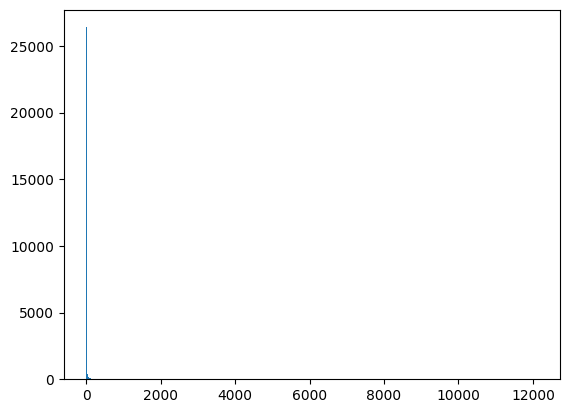

In [11]:
%matplotlib inline

plt.hist(dictionary.dfs.values(), bins=1000)

plt.show()

In [10]:
#lowest frequency tokens; occuring at max 10 documents
freq_count = list(dictionary.dfs.values())
freq_count.sort()

freq = dict()
for doc_count in freq_count:
    if doc_count > 10:
        break
    if doc_count in freq:
        freq[doc_count] += 1
    else:
        freq[doc_count] = 1

for num, fre in freq.items():
    print(f'appeared in {num} docs: {fre} words')

appeared in 1 docs: 15815 words
appeared in 2 docs: 3806 words
appeared in 3 docs: 1882 words
appeared in 4 docs: 1175 words
appeared in 5 docs: 854 words
appeared in 6 docs: 668 words
appeared in 7 docs: 497 words
appeared in 8 docs: 405 words
appeared in 9 docs: 338 words
appeared in 10 docs: 281 words


In [12]:
#examples of those lowest frequency tokens
for n in range(1, 6):
    first_n_ids = [k for k, v in dictionary.dfs.items() if v == n][:10]
    first_n_words = [k for k, v in dictionary.token2id.items() if v in first_n_ids]
    print(f'appeared in {n} docs: {", ".join(first_n_words)}')

appeared in 1 docs: crosssectoral, preblockade, breched, eurygaster, fungicides, hoppers, integriceps, sunn, urea, voles
appeared in 2 docs: unvim, moulavibazar, abstraction, leaf, phosphorous, speakers, taka, adm, harari, bidi
appeared in 3 docs: croplands, meghalaya, nearlyreadyforharvesting, hectare, insecticides, rigorous, jijiga, sparsely, haramrelated, methodology
appeared in 4 docs: hectors, inundation, onrush, enjoy, happy, berbera, jilaal, dissidents, slum, blames
appeared in 5 docs: banking, averaged, guterres, yearthe, droughtinduced, ubangi, secondlargest, oppression, teenage, bakers


In [13]:
#highest frequency tokens; top 10 tokens
freq_count.sort(reverse=True)
top_10_freqs = freq_count[:10]
corpus_size = np.sum(list(dictionary.dfs.values()))

for n in top_10_freqs:
    top_10_ids = [k for k, v in dictionary.dfs.items() if v == n]
    top_10_words = [k for k, v in dictionary.token2id.items() if v in top_10_ids]
    print(f'appeared in {n} docs {", ".join(top_10_words)}')

appeared in 12110 docs BOS, EOS
appeared in 12110 docs BOS, EOS
appeared in 2596 docs people
appeared in 2085 docs reported
appeared in 1952 docs food
appeared in 1791 docs children, cases
appeared in 1791 docs children, cases
appeared in 1779 docs areas
appeared in 1486 docs including
appeared in 1480 docs also


In [10]:
from copy import deepcopy
reduced_dictionary = deepcopy(dictionary)

len_before = len(reduced_dictionary)

reduced_dictionary.filter_extremes(no_below=3,no_above=2)
reduced_dictionary.compactify()

len_after = len(reduced_dictionary)

print(f'Dictionary size reduced from {len_before} to {len_after}, '\
      f'resulting in {round((len_before - len_after)/len_before * 100, 2)}% reduction')

Dictionary size reduced from 30372 to 10751, resulting in 64.6% reduction


In [15]:
print(reduced_dictionary)

Dictionary<10751 unique tokens: ['BOS', 'EOS', 'action', 'addition', 'angola']...>


In [11]:
#removing all words that are not included in our reduced dictionary
data['train']['oov_removed'] = data['train']['final'].apply(lambda x: ([word for word in x.split() if word in set(reduced_dictionary.token2id.keys())]))

In [12]:
data['train']['oov_removed'][example_num]

['BOS',
 'access',
 'latrines',
 'less',
 'locations',
 'reported',
 'almost',
 'nobody',
 'access',
 'latrines',
 'locations',
 'people',
 'locations',
 'kis',
 'reported',
 'least',
 'half',
 'population',
 'access',
 'latrines',
 'people',
 'nearly',
 'everybody',
 'EOS']

In [13]:
#removing OOV words in test and validation set too
data['test']['oov_removed'] = data['test']['final'].apply(lambda x: ([word for word in x.split() if word in set(reduced_dictionary.token2id.keys())]))
data['validation']['oov_removed'] = data['validation']['final'].apply(lambda x: ([word for word in x.split() if word in set(reduced_dictionary.token2id.keys())]))

In [14]:
#outlook on dataframe with various preprocessing steps
data['train']

,text,label,lower,non_alphanum,strip_num,strip_spaces,final,oov_removed
0,In addition to the immediate life-saving inter...,9,in addition to the immediate life-saving inter...,in addition to the immediate lifesaving interv...,in addition to the immediate lifesaving interv...,in addition to the immediate lifesaving interv...,BOS addition immediate lifesaving intervention...,"[BOS, addition, immediate, lifesaving, interve..."
1,There are approximately 2.6 million people cla...,3,there are approximately 2.6 million people cla...,there are approximately 26 million people clas...,there are approximately million people classi...,there are approximately million people classif...,BOS approximately million people classified ph...,"[BOS, approximately, million, people, classifi..."
2,"While aid imports have held up recently, comme...",5,"while aid imports have held up recently, comme...",while aid imports have held up recently commer...,while aid imports have held up recently commer...,while aid imports have held up recently commer...,BOS aid imports held recently commercial food ...,"[BOS, aid, imports, held, recently, commercial..."
3,Heavy rainfalls as well as onrush of water fro...,0,heavy rainfalls as well as onrush of water fro...,heavy rainfalls as well as onrush of water fro...,heavy rainfalls as well as onrush of water fro...,heavy rainfalls as well as onrush of water fro...,BOS heavy rainfalls well onrush water upstream...,"[BOS, heavy, rainfalls, well, onrush, water, u..."
4,"Based on field reports 9 , the main production...",3,"based on field reports 9 , the main production...",based on field reports 9 the main production ...,based on field reports the main production c...,based on field reports the main production cha...,BOS based field reports main production challe...,"[BOS, based, field, reports, main, production,..."
...,...,...,...,...,...,...,...,...
12105,The total gap in the number of people who requ...,8,the total gap in the number of people who requ...,the total gap in the number of people who requ...,the total gap in the number of people who requ...,the total gap in the number of people who requ...,BOS total gap number people require assistance...,"[BOS, total, gap, number, people, require, ass..."
12106,A food crisis is looming in the country with t...,0,a food crisis is looming in the country with t...,a food crisis is looming in the country with t...,a food crisis is looming in the country with t...,a food crisis is looming in the country with t...,BOS food crisis looming country seasons maize ...,"[BOS, food, crisis, looming, country, seasons,..."
12107,? Acute watery diarrhoea (AWD) continues to be...,4,? acute watery diarrhoea (awd) continues to be...,acute watery diarrhoea awd continues to be re...,acute watery diarrhoea awd continues to be re...,acute watery diarrhoea awd continues to be re...,BOS acute watery diarrhoea awd continues repor...,"[BOS, acute, watery, diarrhoea, awd, continues..."
12108,As South India grapples with drought and water...,11,as south india grapples with drought and water...,as south india grapples with drought and water...,as south india grapples with drought and water...,as south india grapples with drought and water...,BOS south india grapples drought water shortag...,"[BOS, south, india, drought, water, shortage, ..."


In [15]:
#final preprocssed dataset
processed_data = dict()
processed_data['train'] = data['train']['oov_removed']
processed_data['test'] = data['test']['oov_removed']
processed_data['validation'] = data['validation']['oov_removed']


processed_data['train_labels'] = data['train']['label']
processed_data['test_labels'] = data['test']['label']
processed_data['validation_labels'] = data['validation']['label']

In [21]:
#no of tokens in the reduced dictionary
reduced_dictionary.keys()[-1]

10750

In [ ]:
#saving prerpocessed data and dictionary 
# import pickle


# with open('processed_data.pickle', 'wb') as handle:
#     pickle.dump(processed_data, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('dictionary.pickle', 'wb') as handle:
#     pickle.dump(dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#Loading the data and dictionary from pickle files
# import pickle as pkl
# reduced_dictionary = pkl.load(open('dictionary.pickle','rb'))
# processed_data = pkl.load(open('processed_data.pickle','rb'))
# print(processed_data.keys())


dict_keys(['train', 'test', 'validation', 'train_labels', 'test_labels', 'validation_labels'])


The fnunction "make_batches", distributes data into non-overlaping batches of a given size and sentence length.

In [16]:
#function to create batches from a given dataset
def make_batches(data, dictionary, max_doc_length, batch_size):
    batches = {}

    sets = ['train', 'test', 'validation']

    inverse_dictionary = {v: k for k, v in dictionary.items()}

    for s in sets:
        s_labels = s + '_labels'
        batches[s] = []
        batches[s_labels] = []

        for idx in range(0,len(data[s]), batch_size):
            cur_batch = []
            labels = []

            for idx2,doc in enumerate(data[s][idx:idx+batch_size]):
                if len(doc) < max_doc_length:
                    doc += ['EOS'] * (max_doc_length - len(doc))
                sent = []
                for word in range(0,max_doc_length):
                    sent.append(inverse_dictionary[doc[word]])
                cur_batch.append(sent)
                labels.append(data[s_labels][idx + idx2])
            batches[s].append(cur_batch)
            batches[s_labels].append(labels)

    return batches

#creating batches
max_doc_length = [50 , 100, 200]
batch_size = [2 , 10, 50]
all_batches = []

for m_length in max_doc_length:
    for b_size in batch_size:
        all_batches.append(make_batches(processed_data, reduced_dictionary, m_length, b_size))

In [23]:
print(all_batches[3]['test'][0])
print(all_batches[3]['test_labels'][0])

[[0, 667, 1139, 3826, 7, 2557, 417, 417, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1861, 1270, 416, 123, 217, 338, 611, 417, 9949, 10095, 1391, 1270, 1851, 1205, 1531, 2692, 5419, 326, 769, 1402, 15, 1401, 8557, 1986, 8556, 1411, 4268, 2537, 1270, 327, 477, 51, 5419, 2118, 2469, 327, 6650, 4174, 688, 3289, 1821, 1270, 3385, 3822, 51, 83, 458, 543, 2221, 2212, 1285, 1659, 255, 4457, 6865, 7452, 948, 1924, 217, 3725, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
[8, 9]


Next, we load the pre-trained word2vec model to create our words embeddings.

In [17]:
#importing word2vec embedding

import gensim.downloader
import numpy as np

model = gensim.downloader.load('word2vec-google-news-300')


In [18]:
#creating embeddings
emb_size = len(model['apple'])
embeddings = []
not_in_model = []
for idx in range(len(dictionary)):
    try:
        embeddings.append(model[dictionary[idx]])
    except:
        embeddings.append(np.random.uniform(low=-1.0, high=1.0, size=emb_size))
        not_in_model.append(dictionary[idx])

In [19]:
#making an embedding look-up
weights = torch.FloatTensor(embeddings)
torch_embedding = torch.nn.Embedding.from_pretrained(weights)

<ipython-input-19-0804a9768f98>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  weights = torch.FloatTensor(embeddings)


Now we define our ClassificationAverageModel:

In [ ]:
#classification average model class
class ClassificationAverageModel(torch.nn.Module):
    def __init__(self, embeddings):
        super(ClassificationAverageModel, self).__init__()
        input = torch.LongTensor([0])
        self.dim = len(embeddings(input)[0])
        self.emb = embeddings
        self.lin_a = torch.nn.Linear(self.dim, 12)

    def forward(self, inp_batch):
        sentes = []
        for doc in inp_batch:
            sum_sent = torch.Tensor([0] *self.dim)
            sent_len = 0

            for word in doc:
                if word == -1:
                    break
                out1 = self.emb(word.type(torch.LongTensor))
                sum_sent = torch.add(sum_sent,out1)
                sent_len += 1

            if sent_len == 0:
                sent_len += 1
            sent = np.divide(np.array(sum_sent), sent_len)
            sentes.append(sent)

        doc_class = self.lin_a(torch.Tensor(sentes))
        batch_labels = doc_class
        return batch_labels

In [ ]:
#training of classification average model
from torch.optim import Adam
import torch.nn as nn

n_epochs = 20
lr = 1e-2
early_stopping = 5

best_model_idx = 0
best_acc_overall = 0
batch_type = -1
train_losses = {}
validation_losses = {}

for batches in all_batches:
    batch_type += 1
    train_losses[batch_type] = []
    validation_losses[batch_type] = []
    loss_fn = nn.CrossEntropyLoss()
    model_avg = ClassificationAverageModel(torch_embedding)
    optimizer = Adam(model_avg.parameters(), lr=lr)

    best_val_acc = 0
    model_save_path = './best_class_avg'

    no_change = 0
    for epoch in range(n_epochs):
        model_avg.train()

        #train
        train_accs = []
        for idx,batch in enumerate(batches['train']):
            output = model_avg(torch.Tensor(batch))
            true_labels = torch.Tensor(batches['train_labels'][idx]).type(torch.int64)
            loss = loss_fn(output,true_labels)
            acc = (output.argmax(dim=1) == true_labels).sum().item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_accs.append(acc/len(true_labels))
        avg_acc = sum(train_accs)/len(train_accs)
        train_losses[batch_type].append(avg_acc)

        #validation
        model_avg.eval()
        val_accs = []
        for idx,batch in enumerate(batches['validation']):
            output = model_avg(torch.Tensor(batch))
            true_labels = torch.Tensor(batches['validation_labels'][idx]).type(torch.int64)
            loss = loss_fn(output,true_labels)
            acc = (output.argmax(dim=1) == true_labels).sum().item()
            val_accs.append(acc/len(true_labels))
        avg_acc = sum(val_accs)/len(val_accs)
        validation_losses[batch_type].append(avg_acc)

        if avg_acc > best_val_acc:
            no_change = 0
            best_val_acc = avg_acc
            torch.save(model_avg.state_dict(), model_save_path + '_{}_.pt'.format(batch_type))

            if avg_acc > best_acc_overall:
                best_acc_overall = avg_acc
                torch.save(model_avg.state_dict(), model_save_path + '.pt')
        else:
            no_change += 1
            if no_change == early_stopping:
                print("Early stopping training this bacth setting")
                break

    print('Batch setting:', batch_type)
    print('best accuracy for this setting is:', best_val_acc)


    if best_val_acc > best_acc_overall:
        best_acc_overall = best_val_acc
        best_model_idx = batch_type


C:\Users\Jenish\AppData\Local\Temp/ipykernel_4516/2426265329.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  batch_labels = torch.nn.functional.softmax(doc_class)


Early stopping training this bacth setting
Batch setting: 0
best accuracy for this setting is: 0.7411402157164869
Batch setting: 1
best accuracy for this setting is: 0.743205128205128
Batch setting: 2
best accuracy for this setting is: 0.713344481605351
Early stopping training this bacth setting
Batch setting: 3
best accuracy for this setting is: 0.7461479198767335
Early stopping training this bacth setting
Batch setting: 4
best accuracy for this setting is: 0.744102564102564
Batch setting: 5
best accuracy for this setting is: 0.7241137123745816
Early stopping training this bacth setting
Batch setting: 6
best accuracy for this setting is: 0.7469183359013868
Early stopping training this bacth setting
Batch setting: 7
best accuracy for this setting is: 0.7444871794871794
Batch setting: 8
best accuracy for this setting is: 0.7426421404682274


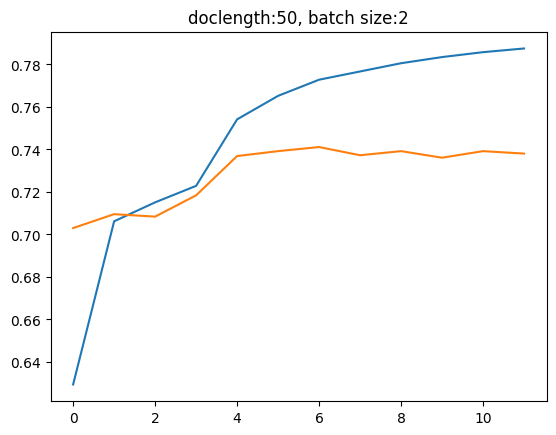

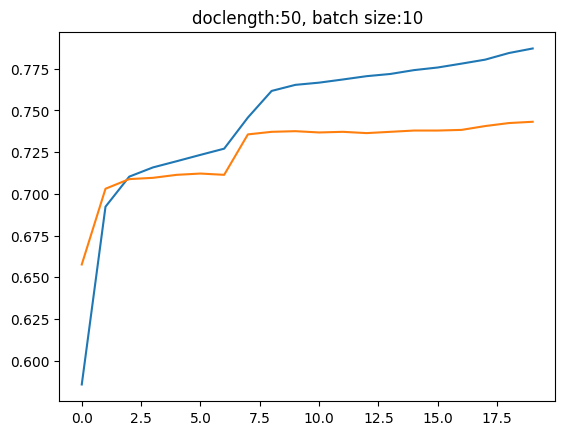

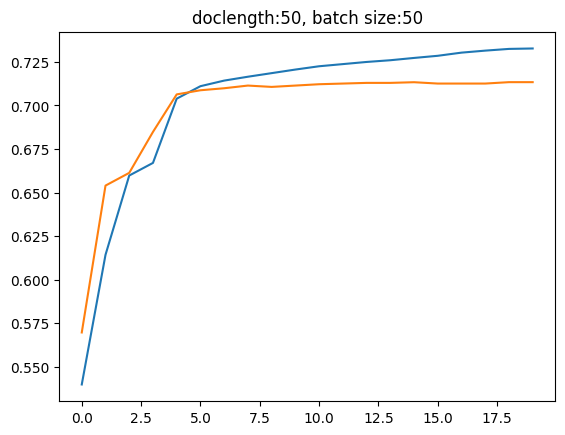

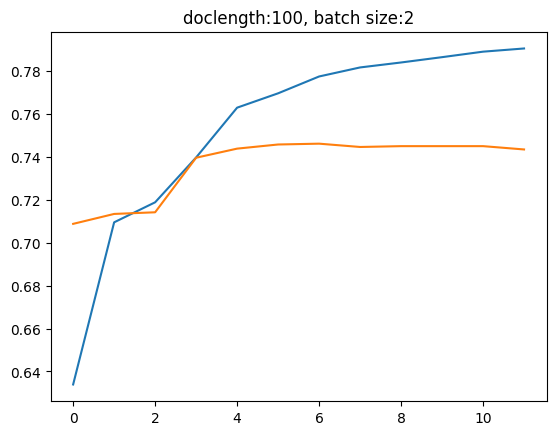

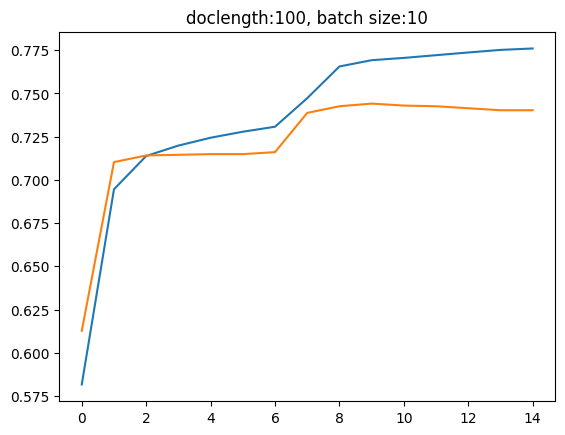

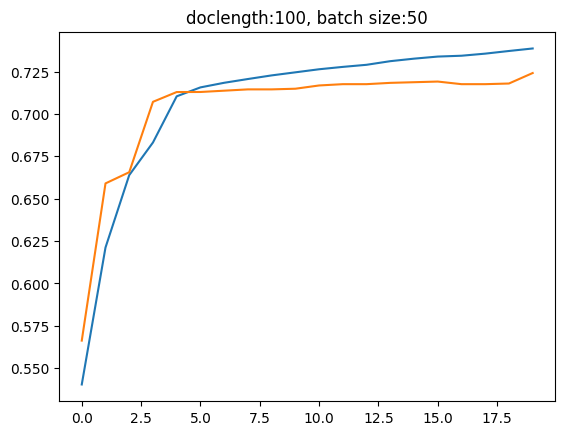

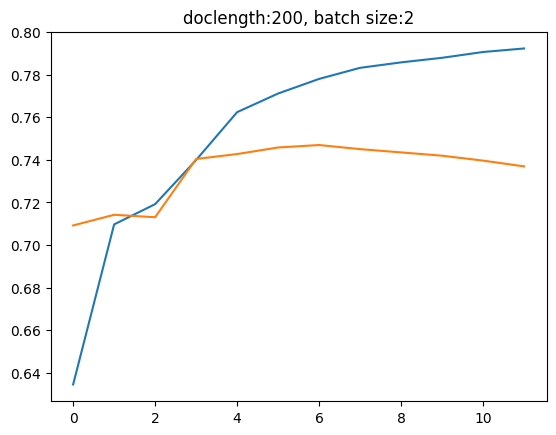

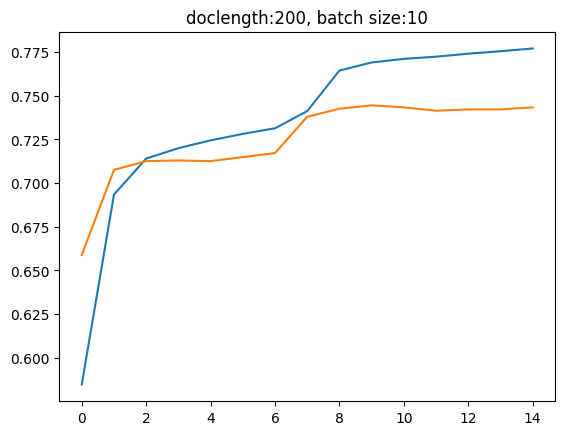

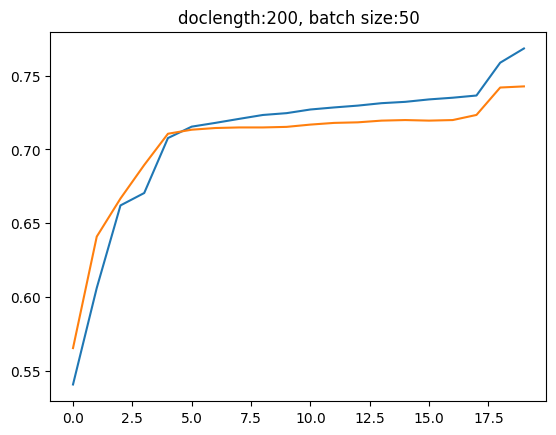

In [ ]:
#plot for validation and training accuracy for different batch sizes configuration
max_doc_length = [50 , 100, 200]
batch_size = [2 , 10, 50]
titles = ['doclength:50, batch size:2','doclength:50, batch size:10','doclength:50, batch size:50','doclength:100, batch size:2','doclength:100, batch size:10','doclength:100, batch size:50','doclength:200, batch size:2','doclength:200, batch size:10','doclength:200, batch size:50']

for plot_num,bt in enumerate(train_losses):
    fig, axs = plt.subplots()
    tl = train_losses[bt]
    vl = validation_losses[bt]
    axs.plot(tl)
    axs.plot(vl)
    axs.set_title(titles[plot_num])

plt.show()

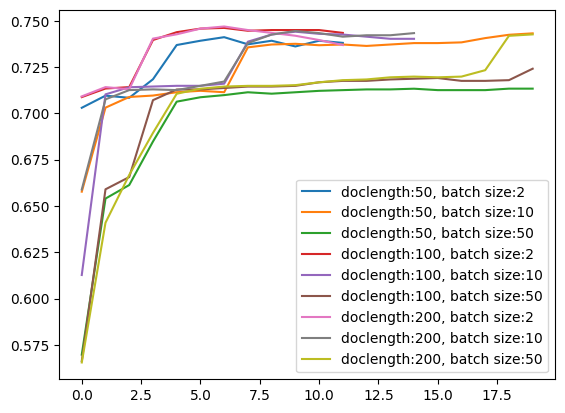

In [ ]:
vl = list(validation_losses.values())
for plot_num,bt in enumerate(vl):
    curr = plt.plot(vl[plot_num], label = titles[plot_num])
plt.legend()
plt.show()

From the chart and training log, we can conclude that the best perfroming model is of batch configuration 6: document length: 200, batch size: 2

In [ ]:
#Average accuray in the test dataset for thr best performing model
final_model = ClassificationAverageModel(torch_embedding)
final_model.load_state_dict(torch.load(model_save_path +  '.pt'))
model_avg.eval()
test_accs = []

for idx,batch in enumerate(batches['test']):
    output = model_avg(torch.Tensor(batch))
    true_labels = torch.Tensor(batches['test_labels'][idx]).type(torch.int64)
    loss = loss_fn(output,true_labels)
    acc = (output.argmax(dim=1) == true_labels).sum().item()
    test_accs.append(acc/len(true_labels))

avg_acc = sum(test_accs)/len(test_accs)
print(avg_acc)

C:\Users\Jenish\AppData\Local\Temp/ipykernel_4516/2426265329.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  batch_labels = torch.nn.functional.softmax(doc_class)


0.7419658119658119


Validation and test accuracy results for best performing model

| Metric | Value |
| --- | --- |
| Validation accuracy | 0.747 |
|  Test accuracy  | 0.742 |


<a name="section-classification-rnn"></a><h2 style="color:rgb(0,120,170)">Task B: Classification with LSTM (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

This task implements a document classification model with PyTorch using Long Short-Term Memory (LSTM). This model should be called **`ClassificationRNNModel`** in your code, which contains all various variants as explained later. The schematic architecture of `ClassificationRNNModel` is shown in the figure below. `ClassificationRNNModel` extends `ClassificationAverageModel` by an LSTM layer. 

<img src="attachment:rnn_model.png" alt="Drawing" style="width: 220px;"/>

The implementation of `ClassificationRNNModel` covers the following points:

**Baseline model (5 points):** The baseline LSTM model first fetches the corresponding embeddings of the word IDs of a given batch. It then calculates hidden states of the given sequences (documents) with the LSTM model. Finally, the **last hidden state** of LSTM is used as document embedding to predict the probability distribution of the output classes by the decoder (a linear projection) and a softmax layer. A dropout layer is applied to the output of the LSTM.

**Model variations (3 points):** Implement the **three variations** of the baseline LSTM model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationRNNModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Variation 1 - Word Embeddings & RNN (1 point).** Select (at least) one of these proposed cases:
  - Freeze the weights of encoder word embeddings (no updates)
  - Initialize the encoder word embeddings randomly instead of using pretrained embeddings. 
  - Increase/decrease the dimension of the hidden state of the RNN.
  - Use GRU instead of LSTM.

- **Variation 2 - Regularization & Optimization (1 point).** Select (at least) one of these proposed cases:
  - Increase/decrease drop out rates and tune the model accordingly.
  - Add L2 weight regularization to the loss function.
  - Use SGD instead of Adam.

- **Variation 3 - Document Embedding (1 point).** Select (at least) one of these proposed cases:
  - Use a Bidirectional LSTM, and set the document embedding as the concatenation of the last state of forward LSTM with the last state of backward LSTM.
  - Calculate the mean of all the intermediary hidden states as the final document embedding.

**Reporting and discussion (2 points)** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

</div>

In [27]:
#use cuda if feasible 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [28]:
rnn_acc = {}

In [29]:
#classification RNN model class
import torch.nn.utils.rnn as rnn_utils

class ClassificationRNNModel(torch.nn.Module):
    def __init__(self, embeddings, h_dim=100, rnn_layers=1, dropout=0.1, output_dim=12, mean=False, device='cuda',bidirectional=False):
        super(ClassificationRNNModel, self).__init__()
        input = torch.LongTensor([0]).to(device)
        self.emb = embeddings.to(device)
        self.dim = len(self.emb(input)[0])
        self.h_dim = h_dim
        self.rnn_layers = rnn_layers
        self.rnn = torch.nn.LSTM(self.dim, self.h_dim, num_layers=rnn_layers,bidirectional=bidirectional)
        if(bidirectional):
            self.lin_a = torch.nn.Linear(self.h_dim*2, output_dim)
        else:
            self.lin_a = torch.nn.Linear(self.h_dim, output_dim)
        self.mean = mean
        self.dropout = torch.nn.Dropout(dropout)

    import torch.nn.utils.rnn as rnn_utils

    def forward(self, inp_batch):
        sent_lengths = [len(sentence) for sentence in inp_batch]
        mask = (inp_batch != 1).float().unsqueeze(-1).to(device)
        
        embed = self.emb(inp_batch.type(torch.LongTensor).to(device))
        
        packed_input = rnn_utils.pack_padded_sequence(embed, sent_lengths, batch_first=True, enforce_sorted=False)
        
        h0 = torch.randn(self.rnn_layers, len(inp_batch), self.h_dim).to(device)
        c0 = torch.randn(self.rnn_layers, len(inp_batch), self.h_dim).to(device)
        packed_output, _ = self.rnn(packed_input, (h0, c0))
        
        output, _ = rnn_utils.pad_packed_sequence(packed_output, batch_first=True)

        if self.mean:
            output = output.sum(dim=1) / mask.sum(dim=1)
        else:
            last_hidden_indices = torch.tensor(sent_lengths) - 1
            output = output[torch.arange(output.size(0)), last_hidden_indices]

        sent_class = self.lin_a(output)
        
        return sent_class


In [30]:
#function to train model 
def train_model(n_epochs, model, batches, optimizer):
  e_val_acc = []
  e_train_acc = []
  for epoch in range(n_epochs):

      model.train()
      train_accs = []
      for idx, batch in enumerate(batches['train']):
          batch = torch.FloatTensor(batch)
          batch = torch.Tensor(batch).to(device)
          output = model(batch)
          true_labels = torch.Tensor(batches['train_labels'][idx]).type(torch.int64)
          true_labels = true_labels.to(device)
          loss = loss_fn(output,true_labels)
          acc = (output.argmax(dim=1) == true_labels).sum().item()
          train_accs.append(acc/len(true_labels))
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()
      
          
      model.eval()
      val_accs = []
      val_loss = []
        
      for idx,batch in enumerate(batches['validation']):
          batch = torch.FloatTensor(batch)
          batch = torch.Tensor(batch).to(device)
          output = model(batch)
          true_labels = torch.Tensor(batches['validation_labels'][idx]).type(torch.int64)
          true_labels = true_labels.to(device)
          loss = loss_fn(output,true_labels)
          acc = (output.argmax(dim=1) == true_labels).sum().item()
          val_accs.append(acc/len(true_labels))
          val_loss.append(loss)

      val_avg_acc = sum(val_accs)/len(val_accs)
      train_avg_acc =  sum(train_accs)/len(train_accs)
      print("Epoch-------", epoch)
      print("Average val accuray", val_avg_acc)
      print("Average train accuray", train_avg_acc)
      print("Average loss", torch.mean(torch.Tensor(val_loss)))
      e_val_acc.append(val_avg_acc)
      e_train_acc.append(train_avg_acc)
  return (e_val_acc, e_train_acc)

In [58]:
#lstm_batches = make_batches(processed_data, reduced_dictionary, 50, 16)
lstm_batches = all_batches[5]

Let's start by training the baseline model. In the following cells, we train each model for only 5 epochs to determine the best performing model, and then train the model with those configuartions further:

In [59]:
from torch.optim import Adam
import torch.nn as nn

n_epochs = 20
lr = 1e-3
loss_fn = nn.CrossEntropyLoss()
hidden_dim = 100
embedding = torch_embedding
dropout = 0.2
batches = lstm_batches 
mean = False

basic_rnn_model = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean)
basic_rnn_model.to(device)
optimizer = Adam(basic_rnn_model.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, basic_rnn_model,batches,optimizer)

rnn_acc['basic'] = {}
rnn_acc['basic']['val'] = basic_val_acc
rnn_acc['basic']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.21613712374581937
Average train accuray 0.2263374485596708
Average loss tensor(2.1079)
Epoch------- 1
Average val accuray 0.21652173913043482
Average train accuray 0.23300411522633738
Average loss tensor(2.1092)
Epoch------- 2
Average val accuray 0.22148829431438125
Average train accuray 0.2358847736625514
Average loss tensor(2.1058)
Epoch------- 3
Average val accuray 0.28578595317725763
Average train accuray 0.26543209876543206
Average loss tensor(2.0196)
Epoch------- 4
Average val accuray 0.3726755852842809
Average train accuray 0.33407407407407386
Average loss tensor(1.8690)
Epoch------- 5
Average val accuray 0.4305016722408028
Average train accuray 0.3983539094650207
Average loss tensor(1.7652)
Epoch------- 6
Average val accuray 0.49172240802675593
Average train accuray 0.4886419753086422
Average loss tensor(1.6684)
Epoch------- 7
Average val accuray 0.5090635451505017
Average train accuray 0.5330041152263375
Average loss tensor(1.6936)
Epoch---

Let's try increaseing the RNN Layers to see if this improves the results:

In [60]:
basic_rnn_model2 = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean,rnn_layers=3)
basic_rnn_model2.to(device)
optimizer = Adam(basic_rnn_model2.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, basic_rnn_model2,batches,optimizer)

rnn_acc['basic2'] = {}
rnn_acc['basic2']['val'] = basic_val_acc
rnn_acc['basic2']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.21033444816053518
Average train accuray 0.22452674897119346
Average loss tensor(2.1130)
Epoch------- 1
Average val accuray 0.24158862876254178
Average train accuray 0.2404938271604937
Average loss tensor(2.0843)
Epoch------- 2
Average val accuray 0.3123244147157192
Average train accuray 0.28930041152263386
Average loss tensor(1.9748)
Epoch------- 3
Average val accuray 0.32424749163879596
Average train accuray 0.3279012345679014
Average loss tensor(1.9298)
Epoch------- 4
Average val accuray 0.34168896321070247
Average train accuray 0.343045267489712
Average loss tensor(1.8863)
Epoch------- 5
Average val accuray 0.3981939799331104
Average train accuray 0.3764609053497944
Average loss tensor(1.8187)
Epoch------- 6
Average val accuray 0.46903010033444825
Average train accuray 0.43761316872427936
Average loss tensor(1.7275)
Epoch------- 7
Average val accuray 0.5117892976588629
Average train accuray 0.5057613168724278
Average loss tensor(1.6550)
Epoch----

Not particularly. Let's move on to the variations.

Now for the first variation, we try increaseing and decreasing the number of neurons in the hidden state:

In [61]:
hidden_dim = 20

rnn_model_var1_low = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean)
rnn_model_var1_low.to(device)
optimizer = Adam(rnn_model_var1_low.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, rnn_model_var1_low,batches,optimizer)

rnn_acc['var_1_1'] = {}
rnn_acc['var_1_1']['val'] = basic_val_acc
rnn_acc['var_1_1']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.2176755852842809
Average train accuray 0.22502057613168727
Average loss tensor(2.1111)
Epoch------- 1
Average val accuray 0.2169063545150502
Average train accuray 0.23407407407407416
Average loss tensor(2.1066)
Epoch------- 2
Average val accuray 0.2188294314381271
Average train accuray 0.23637860082304527
Average loss tensor(2.1035)
Epoch------- 3
Average val accuray 0.2993143812709031
Average train accuray 0.2446090534979423
Average loss tensor(2.0771)
Epoch------- 4
Average val accuray 0.35280936454849504
Average train accuray 0.3223045267489715
Average loss tensor(1.9500)
Epoch------- 5
Average val accuray 0.4372073578595319
Average train accuray 0.3835390946502055
Average loss tensor(1.8493)
Epoch------- 6
Average val accuray 0.4787123745819398
Average train accuray 0.4722633744855966
Average loss tensor(1.7063)
Epoch------- 7
Average val accuray 0.5041304347826087
Average train accuray 0.514156378600823
Average loss tensor(1.6422)
Epoch------- 

In [62]:
hidden_dim = 300

rnn_model_var1_low = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean)
rnn_model_var1_low.to(device)
optimizer = Adam(rnn_model_var1_low.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, rnn_model_var1_low,batches,optimizer)

rnn_acc['var_1_2'] = {}
rnn_acc['var_1_2']['val'] = basic_val_acc
rnn_acc['var_1_2']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.215752508361204
Average train accuray 0.2266666666666667
Average loss tensor(2.1107)
Epoch------- 1
Average val accuray 0.21806020066889634
Average train accuray 0.23292181069958853
Average loss tensor(2.1114)
Epoch------- 2
Average val accuray 0.21725752508361204
Average train accuray 0.23588477366255142
Average loss tensor(2.1080)
Epoch------- 3
Average val accuray 0.21921404682274245
Average train accuray 0.23720164609053507
Average loss tensor(2.1032)
Epoch------- 4
Average val accuray 0.21802675585284284
Average train accuray 0.24576131687242794
Average loss tensor(2.1124)
Epoch------- 5
Average val accuray 0.321170568561873
Average train accuray 0.27259259259259266
Average loss tensor(1.9923)
Epoch------- 6
Average val accuray 0.5079431438127092
Average train accuray 0.47119341563786005
Average loss tensor(1.5805)
Epoch------- 7
Average val accuray 0.586571906354515
Average train accuray 0.5999176954732512
Average loss tensor(1.4239)
Epoch----

In [63]:
hidden_dim = 500

rnn_model_var1_high = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean)
rnn_model_var1_high.to(device)
optimizer = Adam(rnn_model_var1_high.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, rnn_model_var1_high,batches,optimizer)

rnn_acc['var_1_3'] = {}
rnn_acc['var_1_3']['val'] = basic_val_acc
rnn_acc['var_1_3']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.21536789297658862
Average train accuray 0.22641975308641976
Average loss tensor(2.1106)
Epoch------- 1
Average val accuray 0.21652173913043476
Average train accuray 0.23292181069958848
Average loss tensor(2.1096)
Epoch------- 2
Average val accuray 0.21729096989966556
Average train accuray 0.23300411522633735
Average loss tensor(2.1104)
Epoch------- 3
Average val accuray 0.21498327759197317
Average train accuray 0.23506172839506168
Average loss tensor(2.1082)
Epoch------- 4
Average val accuray 0.2583779264214047
Average train accuray 0.24065843621399174
Average loss tensor(2.1136)
Epoch------- 5
Average val accuray 0.2568394648829432
Average train accuray 0.24954732510288066
Average loss tensor(2.1280)
Epoch------- 6
Average val accuray 0.21802675585284276
Average train accuray 0.2562139917695474
Average loss tensor(2.1374)
Epoch------- 7
Average val accuray 0.2668394648829433
Average train accuray 0.26329218106995883
Average loss tensor(2.1236)
Epoc

Now for the second variation, we reset the h_dim parameter to 500 and try both SGD, and increasing the dropout.

In [64]:
from torch.optim import SGD

hidden_dim = 100

rnn_model_var2_sgd = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean)
rnn_model_var2_sgd.to(device)
optimizer = SGD(rnn_model_var2_sgd.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, rnn_model_var2_sgd,batches,optimizer)

rnn_acc['var_2_1'] = {}
rnn_acc['var_2_1']['val'] = basic_val_acc
rnn_acc['var_2_1']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.20379598662207357
Average train accuray 0.14954732510288052
Average loss tensor(2.4721)
Epoch------- 1
Average val accuray 0.20571906354515054
Average train accuray 0.2144855967078188
Average loss tensor(2.4310)
Epoch------- 2
Average val accuray 0.2072575250836121
Average train accuray 0.21720164609053477
Average loss tensor(2.3932)
Epoch------- 3
Average val accuray 0.209180602006689
Average train accuray 0.21950617283950594
Average loss tensor(2.3582)
Epoch------- 4
Average val accuray 0.21033444816053518
Average train accuray 0.21975308641975286
Average loss tensor(2.3258)
Epoch------- 5
Average val accuray 0.21110367892976595
Average train accuray 0.21975308641975286
Average loss tensor(2.2961)
Epoch------- 6
Average val accuray 0.21071906354515058
Average train accuray 0.22057613168724263
Average loss tensor(2.2693)
Epoch------- 7
Average val accuray 0.21071906354515058
Average train accuray 0.22057613168724266
Average loss tensor(2.2454)
Epoc

In [65]:
dropout = 0.5

rnn_model_var2_dropout = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean)
rnn_model_var2_dropout.to(device)
optimizer = Adam(rnn_model_var2_dropout.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, rnn_model_var2_dropout,batches,optimizer)

rnn_acc['var_2_2'] = {}
rnn_acc['var_2_2']['val'] = basic_val_acc
rnn_acc['var_2_2']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.21613712374581937
Average train accuray 0.22872427983539104
Average loss tensor(2.1086)
Epoch------- 1
Average val accuray 0.21767558528428094
Average train accuray 0.234320987654321
Average loss tensor(2.1067)
Epoch------- 2
Average val accuray 0.22033444816053502
Average train accuray 0.23572016460905335
Average loss tensor(2.1049)
Epoch------- 3
Average val accuray 0.2284448160535117
Average train accuray 0.23958847736625513
Average loss tensor(2.0918)
Epoch------- 4
Average val accuray 0.3662374581939799
Average train accuray 0.3193415637860082
Average loss tensor(1.9077)
Epoch------- 5
Average val accuray 0.5025585284280937
Average train accuray 0.4528395061728396
Average loss tensor(1.6040)
Epoch------- 6
Average val accuray 0.5773745819397993
Average train accuray 0.5706995884773661
Average loss tensor(1.4460)
Epoch------- 7
Average val accuray 0.6066053511705685
Average train accuray 0.622222222222222
Average loss tensor(1.3621)
Epoch-------

In [67]:
dropout = 0.5
hidden_dim = 500
rnn_model_var2_dropout = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean)
rnn_model_var2_dropout.to(device)
optimizer = Adam(rnn_model_var2_dropout.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, rnn_model_var2_dropout,batches,optimizer)

rnn_acc['var_2_3'] = {}
rnn_acc['var_2_3']['val'] = basic_val_acc
rnn_acc['var_2_3']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.431170568561873
Average train accuray 0.3026337448559672
Average loss tensor(1.7866)
Epoch------- 1
Average val accuray 0.5646822742474915
Average train accuray 0.5102880658436213
Average loss tensor(1.4396)
Epoch------- 2
Average val accuray 0.617056856187291
Average train accuray 0.61119341563786
Average loss tensor(1.2810)
Epoch------- 3
Average val accuray 0.6655518394648828
Average train accuray 0.6760493827160492
Average loss tensor(1.1364)
Epoch------- 4
Average val accuray 0.6685953177257525
Average train accuray 0.7125925925925924
Average loss tensor(1.1358)
Epoch------- 5
Average val accuray 0.6797491638795985
Average train accuray 0.7372016460905353
Average loss tensor(1.1400)
Epoch------- 6
Average val accuray 0.6913545150501671
Average train accuray 0.7583539094650207
Average loss tensor(1.1171)
Epoch------- 7
Average val accuray 0.71061872909699
Average train accuray 0.7804115226337455
Average loss tensor(1.0640)
Epoch------- 8
Average

Finally, for the third variation we reset the dropout rate and use the mean of the hidden layers:

In [68]:
dropout = 0.2
hidden_dim = 100
mean = True

rnn_model_var3_mean = ClassificationRNNModel(embedding, h_dim=hidden_dim, dropout=dropout,mean=mean)
rnn_model_var3_mean.to(device)
optimizer = Adam(rnn_model_var3_mean.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, rnn_model_var3_mean,batches,optimizer)

rnn_acc['var_3'] = {}
rnn_acc['var_3']['val'] = basic_val_acc
rnn_acc['var_3']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.46745819397993316
Average train accuray 0.34057613168724304
Average loss tensor(1.7141)
Epoch------- 1
Average val accuray 0.5556688963210703
Average train accuray 0.5312757201646088
Average loss tensor(1.4591)
Epoch------- 2
Average val accuray 0.6077591973244147
Average train accuray 0.5995884773662551
Average loss tensor(1.3336)
Epoch------- 3
Average val accuray 0.6435953177257523
Average train accuray 0.6659259259259261
Average loss tensor(1.2209)
Epoch------- 4
Average val accuray 0.6743979933110367
Average train accuray 0.7028806584362143
Average loss tensor(1.1661)
Epoch------- 5
Average val accuray 0.6787290969899664
Average train accuray 0.72641975308642
Average loss tensor(1.1473)
Epoch------- 6
Average val accuray 0.6821571906354513
Average train accuray 0.7446090534979424
Average loss tensor(1.1345)
Epoch------- 7
Average val accuray 0.6644314381270904
Average train accuray 0.7642798353909471
Average loss tensor(1.2431)
Epoch------- 8
A

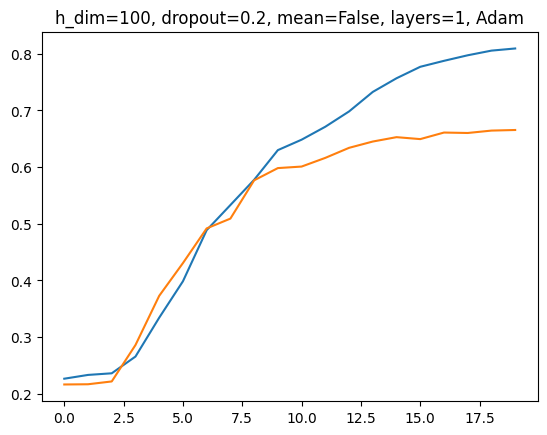

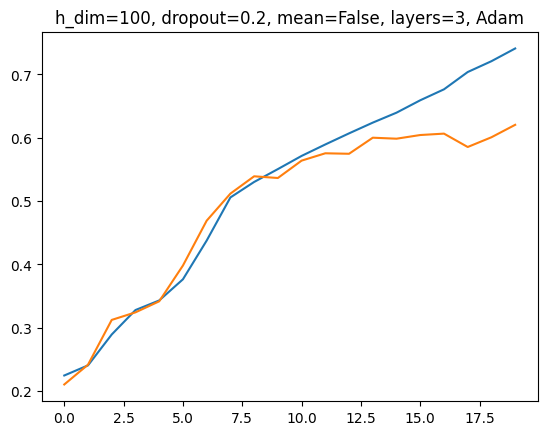

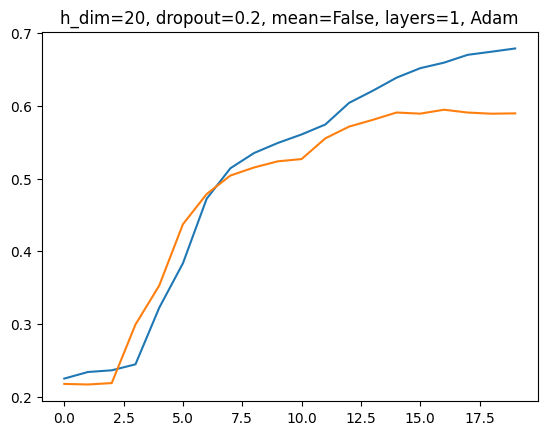

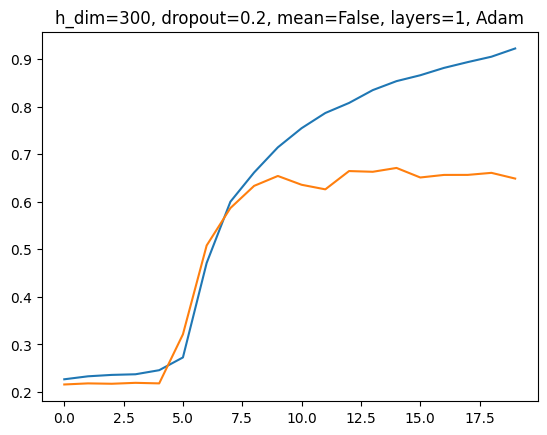

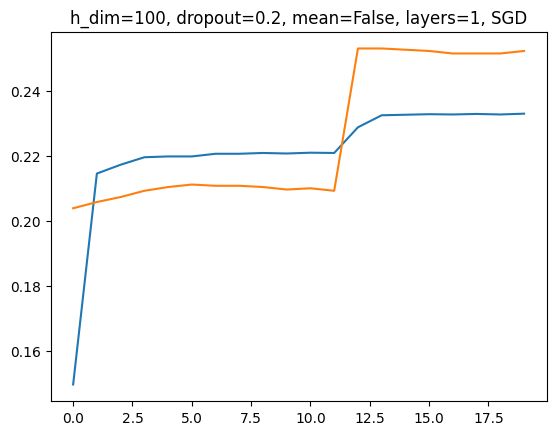

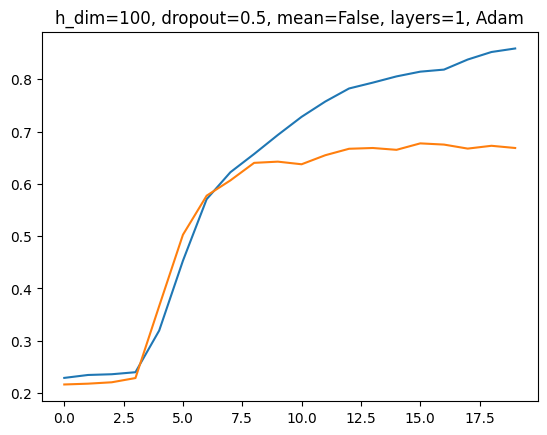

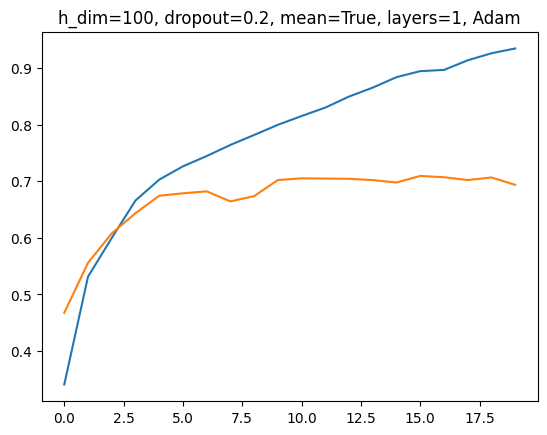

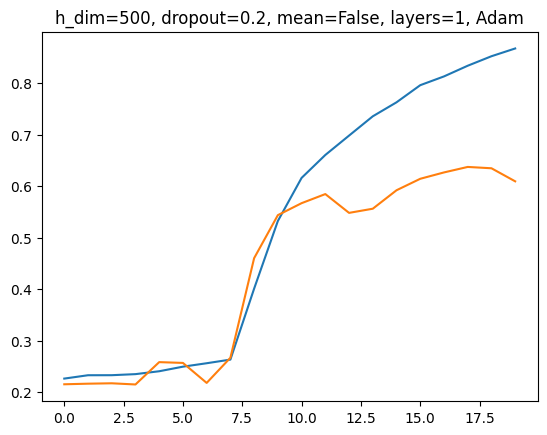

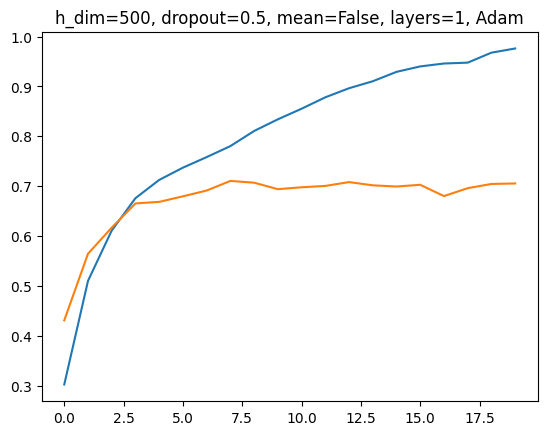

In [73]:
y = [i for i in range(0,20)]
names = {}
names['basic'] = 'h_dim=100, dropout=0.2, mean=False, layers=1, Adam'
names['basic2'] = 'h_dim=100, dropout=0.2, mean=False, layers=3, Adam'
names['var_1_1'] = 'h_dim=20, dropout=0.2, mean=False, layers=1, Adam'
names['var_1_2'] = 'h_dim=300, dropout=0.2, mean=False, layers=1, Adam'
names['var_1_3'] = 'h_dim=500, dropout=0.2, mean=False, layers=1, Adam'
names['var_2_1'] = 'h_dim=100, dropout=0.2, mean=False, layers=1, SGD'
names['var_2_2'] = 'h_dim=100, dropout=0.5, mean=False, layers=1, Adam'
names['var_2_3'] = 'h_dim=500, dropout=0.5, mean=False, layers=1, Adam'
names['var_3'] = 'h_dim=100, dropout=0.2, mean=True, layers=1, Adam'
for key in rnn_acc:
    plt.title('{}'.format(names[key]))
    plt.plot(y,rnn_acc[key]['train'])
    plt.plot(y,rnn_acc[key]['val'])
    plt.show()

In [74]:
n_epochs = 50
lr = 1e-4
basic_rnn_model2 = ClassificationRNNModel(embedding, h_dim=500, dropout=0.5,mean=True,rnn_layers=3)
basic_rnn_model2.to(device)
optimizer = Adam(basic_rnn_model2.parameters(), lr=lr)
basic_val_acc, basic_train_acc = train_model(n_epochs, basic_rnn_model2,batches,optimizer)

rnn_acc['combined'] = {}
rnn_acc['combined']['val'] = basic_val_acc
rnn_acc['combined']['train'] = basic_train_acc

Epoch------- 0
Average val accuray 0.29138795986622085
Average train accuray 0.24222222222222217
Average loss tensor(2.1602)
Epoch------- 1
Average val accuray 0.36197324414715726
Average train accuray 0.3311934156378601
Average loss tensor(1.8397)
Epoch------- 2
Average val accuray 0.4710535117056856
Average train accuray 0.41358024691358053
Average loss tensor(1.6579)
Epoch------- 3
Average val accuray 0.504448160535117
Average train accuray 0.49218106995884775
Average loss tensor(1.5773)
Epoch------- 4
Average val accuray 0.5376254180602007
Average train accuray 0.5341563786008234
Average loss tensor(1.5038)
Epoch------- 5
Average val accuray 0.5518896321070232
Average train accuray 0.5601646090534983
Average loss tensor(1.4666)
Epoch------- 6
Average val accuray 0.5692307692307691
Average train accuray 0.5872427983539099
Average loss tensor(1.4212)
Epoch------- 7
Average val accuray 0.5869565217391304
Average train accuray 0.6070781893004112
Average loss tensor(1.3703)
Epoch-------

In [83]:
import pandas as pd
names['combined'] = 'h_dim=500, dropout=0.5, mean=True, layers=3, Adam'
best_per_setting = {}
for key in rnn_acc:
    best_per_setting[names[key]] = {}
    best_per_setting[names[key]]['train'] = np.max(rnn_acc[key]['train'])
    best_per_setting[names[key]]['val'] = np.max(rnn_acc[key]['val'])
df = pd.DataFrame.from_dict(best_per_setting, orient='index').reset_index(drop=False)
print(df.to_markdown(index=False))

| index                                              |    train |      val |
|:---------------------------------------------------|---------:|---------:|
| h_dim=100, dropout=0.2, mean=False, layers=1, Adam | 0.809465 | 0.665518 |
| h_dim=100, dropout=0.2, mean=False, layers=3, Adam | 0.74107  | 0.620485 |
| h_dim=20, dropout=0.2, mean=False, layers=1, Adam  | 0.678848 | 0.594649 |
| h_dim=300, dropout=0.2, mean=False, layers=1, Adam | 0.922058 | 0.670936 |
| h_dim=100, dropout=0.2, mean=False, layers=1, SGD  | 0.232922 | 0.252993 |
| h_dim=100, dropout=0.5, mean=False, layers=1, Adam | 0.859012 | 0.677441 |
| h_dim=100, dropout=0.2, mean=True, layers=1, Adam  | 0.934897 | 0.709465 |
| h_dim=500, dropout=0.2, mean=False, layers=1, Adam | 0.867325 | 0.637341 |
| h_dim=500, dropout=0.5, mean=False, layers=1, Adam | 0.976049 | 0.710619 |
| h_dim=500, dropout=0.5, mean=True, layers=3, Adam  | 0.88107  | 0.691706 |


<a name="section-classification-attention"></a><h2 style="color:rgb(0,120,170)">Task C: Document Classification with Attention (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Attention networks. The model is called **`ClassificationAttentionModel`** in the code, containing all various variants as explained later. The basic architecture of `ClassificationAttentionModel` is shown in the figure below.

<img src="attachment:att_model.png" alt="Drawing" style="width: 290px;"/>

The implementation of the basic architecture of `ClassificationAttentionModel` should cover the following points:

**Baseline model**  

- **Embeddings & RNN Layer (1 points).** The baseline model first fetches the corresponding embeddings of the word IDs of a given batch. Next, a bidirectional LSTM/GRU layer is applied to the word embeddings. The hidden states of this RNN model can be seen as the contextual embeddings of the underlying word embeddings, and will be used in the next layer instead of the original word embeddings.

- **Attention Layer (4 points).** This Attention layer should be implemented by you from scratch without using any specific library/class. Here, you implement the baseline Attention layer following the formulation of the (single-head) **basic dot-product Attention**. In this model, Query vector is defined in the model's initialization as *a vector of learnable parameters*, whose values are learned together with the other model's parameters during training. The hidden states of the previous layer are passed as the values (and keys) to the Attention layer, where the Query vector is the query of the Attention. An important point in the forward pass of the Attention layer is correctly setting the padding masks, which mask out the attention weights of the padded tokens of each batch. The masks excludes the corresponding vectors of these padded tokens from the calculations in Attention. If the mask is not passed correctly, the padded items will be counted in the Softmax of the Attention layer, and influence other attention weights. A sign that the baseline model is working correctly is that the final attention weights of the corresponding vectors of the padded tokens are equal to zero. 

- **Prediction Layer (1 points).** The output of the Attention layer for each batch is the corresponding document embedding, passed to the decoder layer (a linear projection) and softmax to predict the probability distribution of the output classes.

- **General model functionality (1 points).** 


**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationAttentionModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **No RNN (1 point).** Run the model without the RNN layer.

- **Another attention variation (1 point).** Implement another type of single-head Attention other than basic dot-product.

**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


</div>

In [76]:
#use cuda if feasible 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
#download and load word2vec embeddings
import gensim.downloader
import numpy as np

model = gensim.downloader.load('word2vec-google-news-300')

# #creating embeddings
emb_size = len(model['apple'])
embeddings = []
not_in_model = []
for idx in range(len(reduced_dictionary)):
    try:
        embeddings.append(model[reduced_dictionary[idx]])
    except:
        embeddings.append(np.random.uniform(low=-1.0, high=1.0, size=emb_size))
        not_in_model.append(reduced_dictionary[idx])

#embedding for padding
embeddings.append(np.random.uniform(low=-1.0, high=1.0, size=emb_size))

#making an embedding look-up
weights = torch.FloatTensor(embeddings)
torch_embedding = torch.nn.Embedding.from_pretrained(weights)




[==================================================] 100.0% 1662.8/1662.8MB downloaded


<ipython-input-13-ebebb4be5286>:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  weights = torch.FloatTensor(embeddings)


In [ ]:
#load embeddings from weights
#30371 : 30370 size of dictionary and 1 for paddings
# torch_embedding = torch.nn.Embedding(30371,300)
# torch_embedding.load_state_dict(torch.load("/content/embedding.pth"))

<All keys matched successfully>

In [ ]:
import torch
import torch.nn as nn

#Cllassification Attention Model

class ClassificationAttentionModel(nn.Module):
    def __init__(self, embedding, embedding_dim, hidden_dim, num_classes, rnn_switch, additive_attention):
        super(ClassificationAttentionModel, self).__init__()

        #parameter to use LSTM RNN or not
        self.rnn_switch = rnn_switch

        #parameter to use additive attention instead of basic dot product
        self.additive_attention = additive_attention

        # Word embeddings layer
        self.embeddings = embedding
        
        # RNN layer
        if self.rnn_switch:
          self.rnn = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        else:
          hidden_dim = embedding_dim

        
        
        # Attention layer
        self.query = nn.Parameter(torch.randn(hidden_dim)) # Query vector
        self.softmax = nn.Softmax(dim=1) # Softmax activation function

        #parameters for additive attention
        if self.additive_attention:
          self.W1 = nn.Linear(hidden_dim, hidden_dim, bias=False)
          self.W2 =  nn.Linear(hidden_dim, hidden_dim, bias=False)
          self.v = nn.Linear(hidden_dim, 1, bias=False)
        
        # Prediction layer
        self.decoder = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, inputs):
        # Fetch word embeddings
        embeddings = self.embeddings(inputs.type(torch.LongTensor).to(device))
        
        # Apply RNN layer and get hidden states
        if self.rnn_switch:
          rnn_output, _ = self.rnn(embeddings)
          hidden_states = rnn_output[:, :, :hidden_dim] + rnn_output[:, :, hidden_dim:] # Sum the outputs of both directions of RNN

        else:
          #if no RNN layer
          hidden_states = embeddings



        if self.additive_attention:
          # Calculate attention scores for additive attention
          W_h = self.W1(hidden_states)
          W_q = self.W2(self.query)
          u = torch.tanh(W_h + W_q)
          
          attention_scores = self.v(u).squeeze(2)
        else:
          #apply basic dot product attention

          
          # Calculate attention weights
          query = self.query.unsqueeze(0).expand(inputs.size(0), -1) #gives us (2,3) shape query
          query = query.unsqueeze(2) # gives us 2x3x1 from 2x3 shape #s
          
          #batch matrix multiplication (bxnxm) x (bxmxp) gives (bxnxp)
          attention_scores = torch.bmm(hidden_states, query).squeeze(2) # Dot product of hidden states and query


        
        #padding values shoudl be zero when calculating attention; no attention to padding
        #30370 value for -1(padded) values
        mask = (inputs != 30370).type(torch.float32) # Padding mask
  
        masked_score = attention_scores * mask # Apply mask
    
        #convert 0 to -1e9 so that the padded values attention weights will be 0
        masked_score[masked_score == 0] = -1e9
        

    
        attention_weights = self.softmax(masked_score)
        # Softmax to get attention weights
        
        # Calculate document embeddings
        #context vector : dot product of attention weights ,each time steps(words) gives us the context
        #weighted sum of the hidden states: result (b*h)
        context = torch.bmm(hidden_states.transpose(1, 2), attention_weights.unsqueeze(2)).squeeze(2) 
        outputs = self.decoder(context) # Linear projection
        outputs = nn.functional.softmax(outputs, dim=1) # Softmax to get output probabilities
        
        return outputs


In [ ]:
#function to train model 
def train_model(n_epochs, attn_model,batches,optimizer):
  e_val_acc = []
  e_train_acc = []
  for epoch in range(n_epochs):

      attn_model.train()
      train_accs = []
      for idx, batch in enumerate(batches['train']):
          batch = torch.FloatTensor(batch)
          # instead of -1 use 30370 index for padding
          batch[batch == -1] = 30370
          batch = torch.Tensor(batch).to(device)
          output = attn_model(batch)
          true_labels = torch.Tensor(batches['train_labels'][idx]).type(torch.int64)
          true_labels = true_labels.to(device)
          loss = loss_fn(output,true_labels)
          acc = (output.argmax(dim=1) == true_labels).sum().item()
          train_accs.append(acc/len(true_labels))
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()
      
          
      attn_model.eval()
      val_accs = []
      val_loss = []
        
      for idx,batch in enumerate(batches['validation']):
          batch = torch.FloatTensor(batch)
          batch[batch == -1] = 30370
          batch = torch.Tensor(batch).to(device)
          output = attn_model(batch)
          true_labels = torch.Tensor(batches['validation_labels'][idx]).type(torch.int64)
          true_labels = true_labels.to(device)
          loss = loss_fn(output,true_labels)
          acc = (output.argmax(dim=1) == true_labels).sum().item()
          val_accs.append(acc/len(true_labels))
          val_loss.append(loss)

      val_avg_acc = sum(val_accs)/len(val_accs)
      train_avg_acc =  sum(train_accs)/len(train_accs)
      losses.append(torch.mean(torch.Tensor(val_loss)))
      accuracies.append(val_avg_acc)
      print("Epoch-------", epoch)
      print("Average val accuray", val_avg_acc)
      print("Average train accuray", train_avg_acc)
      print("Average loss", torch.mean(torch.Tensor(val_loss)))
      e_val_acc.append(val_avg_acc)
      e_train_acc.append(train_avg_acc)
  return (e_val_acc, e_train_acc)

In [ ]:

from torch.optim import Adam
import torch.nn as nn

n_epochs = 20
lr = 1e-4
loss_fn = nn.CrossEntropyLoss()
vocab_size = len(reduced_dictionary) + 1 # +1 for the padded words are 
embedding_dim = 300
hidden_dim = 25
num_classes = 12
embedding = torch_embedding

batches = all_batches[5] # we are using batches from exercise 1 



#training with basic dot product attention
rnn_switch = True
additive_attention = False
basic_attn_model = ClassificationAttentionModel(embedding, embedding_dim, hidden_dim, num_classes, rnn_switch, additive_attention)
basic_attn_model.to(device)
optimizer = Adam(basic_attn_model.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, basic_attn_model,batches,optimizer)

#training with basic dot product attention but no rnn
rnn_switch = False
additive_attention = False
lr = 1e-3
nornn_basic_model = ClassificationAttentionModel(embedding, embedding_dim, hidden_dim, num_classes, rnn_switch, additive_attention)
nornn_basic_model.to(device)
optimizer = Adam(nornn_basic_model.parameters(), lr=lr)
nornn_val_acc, nornn_train_acc = train_model(n_epochs, nornn_basic_model,batches,optimizer)


#training with additive attention
rnn_switch = True
additive_attention = True
lr = 1e-4
add_attn_model = ClassificationAttentionModel(embedding, embedding_dim, hidden_dim, num_classes, rnn_switch, additive_attention)
add_attn_model.to(device)
optimizer = Adam(add_attn_model.parameters(), lr=lr)
add_attn_val_acc, add_attn_train_acc = train_model(n_epochs, add_attn_model,batches,optimizer)









Epoch------- 0
Average val accuray 0.4999665551839467
Average train accuray 0.26427983539094657
Average loss tensor(2.2921)
Epoch------- 1
Average val accuray 0.5954515050167223
Average train accuray 0.5827160493827159
Average loss tensor(2.0720)
Epoch------- 2
Average val accuray 0.6774749163879599
Average train accuray 0.6624691358024686
Average loss tensor(2.0004)
Epoch------- 3
Average val accuray 0.7064214046822741
Average train accuray 0.7098765432098763
Average loss tensor(1.9560)
Epoch------- 4
Average val accuray 0.7537625418060201
Average train accuray 0.7714403292181072
Average loss tensor(1.9173)
Epoch------- 5
Average val accuray 0.7564882943143814
Average train accuray 0.7936625514403295
Average loss tensor(1.8947)
Epoch------- 6
Average val accuray 0.7572909698996657
Average train accuray 0.8030452674897122
Average loss tensor(1.8835)
Epoch------- 7
Average val accuray 0.7572909698996657
Average train accuray 0.8099588477366259
Average loss tensor(1.8773)
Epoch------- 8


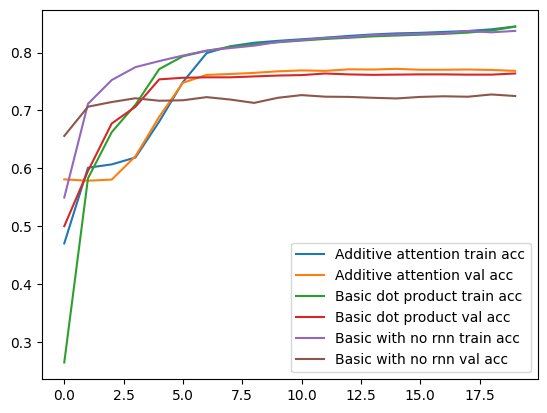

In [ ]:
#plot of validation and training accuracy during training for different varaints
fig, axs = plt.subplots()
plt.plot(add_attn_train_acc, label="Additive attention train acc")
axs.plot(add_attn_val_acc,  label="Additive attention val acc")
plt.plot(basic_train_acc, label="Basic dot product train acc")
axs.plot(basic_val_acc,  label="Basic dot product val acc")
plt.plot(nornn_train_acc, label="Basic with no rnn train acc")
axs.plot(nornn_val_acc,  label="Basic with no rnn val acc")

plt.legend()
plt.show()

All three attention model variants achieve around 0.85 train accuracy when they are trained for 20 epochs. In terms of validation accuracy there is not much difference between basic dot product
and additive attention model but we can still observe that additive attention model validation accuracy is slightly better than basic dot product one whereas basic model with no rnn performs worst.

In [ ]:
#Average accuray in the test dataset

def calculate_test_accuracy(batches,model):
  model.eval()
  test_accs = []

  for idx,batch in enumerate(batches['test']):
      batch = torch.FloatTensor(batch)
      batch[batch == -1] = 30370
      batch = torch.Tensor(batch).to(device)
      output = model(torch.Tensor(batch))
      true_labels = torch.Tensor(batches['test_labels'][idx]).type(torch.int64)
      true_labels = true_labels.to(device)
      loss = loss_fn(output,true_labels)
      acc = (output.argmax(dim=1) == true_labels).sum().item()
      test_accs.append(acc/len(true_labels))

  avg_acc = sum(test_accs)/len(test_accs)
  return avg_acc

print("Test accuracy for basic dot product model", calculate_test_accuracy(batches,basic_attn_model))
print("Test accuracy for basic dot product with no rnn model", calculate_test_accuracy(batches,nornn_basic_model))
print("Test accuracy for attentive addition model", calculate_test_accuracy(batches,add_attn_model))

Test accuracy for basic dot product model 0.7631196581196582
Test accuracy for basic dot product with no rnn model 0.7341880341880338
Test accuracy for attentive addition model 0.7712393162393165


The results for three models on test dataset is pretty much similar to results on validation set. Attention additive model variant has best test accuracy , basic dot product has near about accuracy  
whereas basic dot product model with no rnn has worst test accuracy among three.

| Model| Metric | Value |
| --- | --- | --- |
| Basic dot product with RNN | Test accuracy | 0.76 |
| Basic dot product without RNN | Test accuracy  | 0.73 |
| Additive Attention  with RNN | Test accuracy  | 0.77  |

Hence, it seems the additive attention varaint is the most effective one.

<a name="section-classification-transformer"></a><h2 style="color:rgb(0,120,170)">Task D: Document Classification with Transformer (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Transformer Decoder. This model is called **`ClassificationTransformerModel`** in the code, containing all various variants as explained later. 

The implementation of the basic architecture of `ClassificationTransformerModel` covers the following points:

**Baseline model:** The architecture of baseline `ClassificationTransformerModel`is the exactly the same as the one of `ClassificationAttentionModel`. The only difference is that `ClassificationTransformerModel` replaces the Attention layer with a Transformer Decoder. 

- **Transformer Decoder (3 points).** Use `torch.nn.TransformerDecoder` class or any other implementation of Transformer Decoder. The baseline model consists of one layer of Transformer Decoder and is defined with default parameters of Transformer Decoder. As before, Query vector is defined separately, and used as the query of the Transformer.

- **Model Functionality (1 point).**

**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationTransformerModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Transformer Encoder (3 point).** Replace the RNN layer with a Transformer Encoder. Similar to the RNN, the aim of this layer is to provide contextual embeddings of the input word embeddings. 

- **Number of heads (1 point).** Study the effect of increasing/decreasing the number of heads of the Transformer Decoder.

- **Number of layers (1 point).** Study the effect of increasing the layers of the Transformer Decoder.


**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.
</div>

In [20]:
#use cuda if feasible 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [30]:
import torch
import torch.nn as nn
from torch.nn import TransformerDecoder,TransformerEncoder
import math 
import torch.nn.utils.rnn as rnn_utils

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=0.1)
        pe = torch.zeros(max_seq_len, d_model)
        position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)


class ClassificationTransformerModel(nn.Module):
    def __init__(self, embedding, hidden_size=32, output_size=12, num_layers=1, nhead=1, device='cuda', use_encoder=False):
        super(ClassificationTransformerModel, self).__init__()
        input = torch.LongTensor([0]).to(device)
        self.use_encoder = use_encoder
        self.emb = embedding.to(device)
        self.dim = len(embedding(input)[0])
        self.num_layers = num_layers
        self.h_dim=hidden_size
        if self.use_encoder:
            # Define the Transformer Encoder
            self.encoder_layer = nn.TransformerEncoderLayer(self.dim, nhead)
            self.encoder = TransformerEncoder(self.encoder_layer, num_layers)
            self.encoder_fc = nn.Linear(self.dim, 2*hidden_size)
        else:
            self.encoder = nn.LSTM(self.dim, hidden_size, num_layers, batch_first=False, bidirectional=True)
        self.pos_encoder = PositionalEncoding(self.dim)

        # Define the Transformer Decoder
        self.decoder = TransformerDecoder(nn.TransformerDecoderLayer(2*hidden_size, nhead), num_layers)

        # Define the output layer
        self.fc = nn.Linear(2*hidden_size, output_size)
        
        # Define the query vector
        self.query = nn.Parameter(torch.randn(1, 1, hidden_size*2))  # Trainable parameter

    def forward(self, input):

        sent_lengths = [len(sentence) for sentence in input]
        mask = (input != 1).float().unsqueeze(-1).to(device)

        emb = self.emb(input.type(torch.LongTensor).to(device))
        pos_enc = self.pos_encoder(emb)
        packed_input = rnn_utils.pack_padded_sequence(pos_enc, sent_lengths, batch_first=True, enforce_sorted=False)

        if(self.use_encoder):
            encoded = self.encoder(packed_input)
            encoded = encoded[:, -1, :]
            encoded = self.encoder_fc(encoded).unsqueeze(0)
        else:
            h0 = torch.randn(self.num_layers*2, len(input), self.h_dim).to(device)
            c0 = torch.randn(self.num_layers*2, len(input), self.h_dim).to(device)
            encoded, _ = self.encoder(packed_input, (h0, c0))
        
        encoded, _ = rnn_utils.pad_packed_sequence(encoded, batch_first=True)
        last_hidden_indices = torch.tensor(sent_lengths) - 1
        encoded = encoded[torch.arange(encoded.size(0)), last_hidden_indices].unsqueeze(0)

        query = self.query.expand(-1, input.size(0), -1)
        
        # Apply the Transformer Decoder
        output = self.decoder(query, encoded)

        # Apply the output layer
        output = self.fc(output)
        return output.squeeze()


In [33]:
#function to train model 
def train_model(n_epochs, model, batches, optimizer):
  e_val_acc = []
  e_train_acc = []
  for epoch in range(n_epochs):

      model.train()
      train_accs = []

      for idx, batch in enumerate(batches['train']):
          batch = torch.Tensor(batch).to(device)
          output = model(batch)
          true_labels = torch.Tensor(batches['train_labels'][idx]).type(torch.int64)
          true_labels = true_labels.to(device)
          loss = loss_fn(output,true_labels)
          acc = (output.argmax(dim=1) == true_labels).sum().item()
          train_accs.append(acc/len(true_labels))
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()
      
          
      model.eval()
      val_accs = []
      val_loss = []
        
      for idx,batch in enumerate(batches['validation']):
          batch = torch.FloatTensor(batch)
          batch[batch == -1] = 30370
          batch = torch.Tensor(batch).to(device)
          output = model(batch)
          true_labels = torch.Tensor(batches['validation_labels'][idx]).type(torch.int64)
          true_labels = true_labels.to(device)
          loss = loss_fn(output,true_labels)
          acc = (output.argmax(dim=1) == true_labels).sum().item()
          val_accs.append(acc/len(true_labels))
          val_loss.append(loss)

      val_avg_acc = sum(val_accs)/len(val_accs)
      train_avg_acc =  sum(train_accs)/len(train_accs)
      print("Epoch-------", epoch)
      print("Average val accuray", val_avg_acc)
      print("Average train accuray", train_avg_acc)
      print("Average loss", torch.mean(torch.Tensor(val_loss)))
      e_val_acc.append(val_avg_acc)
      e_train_acc.append(train_avg_acc)
  return (e_val_acc, e_train_acc)

In [ ]:
from torch.optim import Adam
import torch.nn as nn

n_epochs = 20
lr = 1e-3
loss_fn = nn.CrossEntropyLoss()
hidden_dim = 500
embedding = torch_embedding
dropout = 0.1
batches = all_batches[0] # we are using batches from exercise 1 
mean = False

basic_rnn_model = ClassificationTransformerModel(embedding,use_encoder=False)
basic_rnn_model.to(device)
optimizer = Adam(basic_rnn_model.parameters(), lr=lr)

basic_val_acc, basic_train_acc = train_model(n_epochs, basic_rnn_model,batches,optimizer)


Epoch------- 0
Average val accuray 0.2561633281972265
Average train accuray 0.2236168455821635
Average loss tensor(2.1173)
Epoch------- 1
Average val accuray 0.2561633281972265
Average train accuray 0.22378199834847234
Average loss tensor(2.1134)


<a name="section-interpretation"></a><h2 style="color:rgb(0,120,170)">Task E: Interpreting Attention Weights (3 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The aim of this task is to provide an interpretation of the functionality of one of the models, by exploring which words have the higher contributions to the prediction results of some specific documents. 

**Attention weights (2.5 extra points):** Select one of the models trained in the previous tasks as you prefer. Select four documents from test set, such that two are correctly and the other two are incorrectly classified by the model. Next, run the forward pass for each of these documents and extract the corresponding attention weights from the model. Separately for each document, interpret the mechanism of the classifier by looking at the words with the highest attention weights. Do these words – in your opinion – provide important information to the predicted class?

**Visualization (0.5 overall extra points):** Visualize the attention weights over document’s words. Some suggested tools and resources:

https://github.com/minqi/hnatt

https://github.com/jiesutd/Text-Attention-Heatmap-Visualization 

https://github.com/cbaziotis/neat-vision
</div>

In [ ]:
import torch
import torch.nn as nn

#Cllassification Attention Model from exercise C
#slight alteration to get also get the attention weights for a respective input

class ClassificationAttentionModel(nn.Module):
    def __init__(self, embedding, embedding_dim, hidden_dim, num_classes, rnn_switch, additive_attention):
        super(ClassificationAttentionModel, self).__init__()
        self.attention_weights = []

        #parameter to use LSTM RNN or not
        self.rnn_switch = rnn_switch

        #parameter to use additive attention instead of basic dot product
        self.additive_attention = additive_attention

        # Word embeddings layer
        self.embeddings = embedding
        
        # RNN layer
        if self.rnn_switch:
          self.rnn = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        else:
          hidden_dim = embedding_dim

        
        
        # Attention layer
        self.query = nn.Parameter(torch.randn(hidden_dim)) # Query vector
        self.softmax = nn.Softmax(dim=1) # Softmax activation function

        #parameters for additive attention
        if self.additive_attention:
          self.W1 = nn.Linear(hidden_dim, hidden_dim, bias=False)
          self.W2 =  nn.Linear(hidden_dim, hidden_dim, bias=False)
          self.v = nn.Linear(hidden_dim, 1, bias=False)
        
        # Prediction layer
        self.decoder = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, inputs):
        # Fetch word embeddings
        embeddings = self.embeddings(inputs.type(torch.LongTensor).to(device))
        
        # Apply RNN layer and get hidden states
        if self.rnn_switch:
          rnn_output, _ = self.rnn(embeddings)
          hidden_states = rnn_output[:, :, :hidden_dim] + rnn_output[:, :, hidden_dim:] # Sum the outputs of both directions of RNN

        else:
          #if no RNN layer
          hidden_states = embeddings



        if self.additive_attention:
          # Calculate attention scores for additive attention
          W_h = self.W1(hidden_states)
          W_q = self.W2(self.query)
          u = torch.tanh(W_h + W_q)
          
          attention_scores = self.v(u).squeeze(2)
        else:
          #apply basic dot product attention

          
          # Calculate attention weights
          query = self.query.unsqueeze(0).expand(inputs.size(0), -1) #gives us (2,3) shape query
          query = query.unsqueeze(2) # gives us 2x3x1 from 2x3 shape #s
          
          #batch matrix multiplication (bxnxm) x (bxmxp) gives (bxnxp)
          attention_scores = torch.bmm(hidden_states, query).squeeze(2) # Dot product of hidden states and query


        
        #padding values shoudl be zero when calculating attention; no attention to padding
        #30370 value for -1(padded) values
        mask = (inputs != 30370).type(torch.float32) # Padding mask
  
        masked_score = attention_scores * mask # Apply mask
    
        #convert 0 to -1e9 so that the padded values attention weights will be 0
        masked_score[masked_score == 0] = -1e9
        

    
        self.attention_weights = self.softmax(masked_score)
        # Softmax to get attention weights
        
        # Calculate document embeddings
        #context vector : dot product of attention weights ,each time steps(words) gives us the context
        #weighted sum of the hidden states: result (b*h)
        context = torch.bmm(hidden_states.transpose(1, 2), self.attention_weights.unsqueeze(2)).squeeze(2) 
        outputs = self.decoder(context) # Linear projection
        outputs = nn.functional.softmax(outputs, dim=1) # Softmax to get output probabilities
        
        return outputs


In [ ]:
#load weights to get trained additive attention model from exercise C

#use cuda if feasible 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#load embeddings from weights
#30371 : 30370 size of dictionary and 1 for paddings
torch_embedding = torch.nn.Embedding(30371,300)
torch_embedding.load_state_dict(torch.load("/content/embedding.pth"))


vocab_size = len(reduced_dictionary) + 1 # +1 for the padded words are 
embedding_dim = 300
hidden_dim = 25
num_classes = 12
embedding = torch_embedding

#use additive attention with RNN
rnn_switch = True
additive_attention = True
lr = 1e-4
add_attn_model = ClassificationAttentionModel(embedding, embedding_dim, hidden_dim, num_classes, rnn_switch, additive_attention)
add_attn_model.to(device)

add_attn_model.load_state_dict(torch.load("/content/add_attn_model.pt"))
add_attn_model.eval()

ClassificationAttentionModel(
  (embeddings): Embedding(30371, 300)
  (rnn): LSTM(300, 25, batch_first=True, bidirectional=True)
  (softmax): Softmax(dim=1)
  (W1): Linear(in_features=25, out_features=25, bias=False)
  (W2): Linear(in_features=25, out_features=25, bias=False)
  (v): Linear(in_features=25, out_features=1, bias=False)
  (decoder): Linear(in_features=25, out_features=12, bias=True)
)

In [ ]:
#function to analysis model attention for a document
def analysis_attn(batch):

  document = ''

  #document contnet
  for i in batch:
    if i != -1:
      document += reduced_dictionary[i]
      document += ' '
    else:
      document += ''

  print(document)


  doc = torch.Tensor(batch.copy())
  doc[doc == -1] = 30370
  doc  = torch.Tensor(doc).to(device)
  output =add_attn_model(doc.reshape(1,-1))
  
  #grab top six words based on attention weights
  top_six_words = torch.topk(add_attn_model.attention_weights.flatten(), 6).indices
  top_six_words = [reduced_dictionary[batch[i]] for i in top_six_words]
  print("Top six words based on their attention weights", top_six_words)
  print("Predicted label", output.argmax(dim=1).item())



In [ ]:
#incorrect predictions
batches = all_batches[5]

analysis_attn(batches['test'][6][12])
print("Correct label", batches['test_labels'][6][12])
print('---------------')

analysis_attn(batches['test'][2][0])
print("Correct label", batches['test_labels'][2][0])

print('---------------')

#correct
batches = all_batches[5]

analysis_attn(batches['test'][4][12])
print("Correct label", batches['test_labels'][4][12])
print('---------------')

analysis_attn(batches['test'][4][7])
print("Correct label", batches['test_labels'][4][7])


several occasions april may israeli forces launched multiple airstrikes fired shells gaza reportedly targeting military sites resulting damage injuries 
Top six words based on their attention weights ['shells', 'injuries', 'damage', 'airstrikes', 'fired', 'targeting']
Predicted label 9
Correct label 10
---------------
previous years humanitarians witnessed high levels insecurity violence particularly areas southern central somalia sporadic incidents humanitarians also occurred somaliland puntland violent incidents led deaths humanitarian staff injury arrests detention abduction three physical assault five humanitarian personnel impacted humanitarian organizations per cent increase overall number incidents compared 
Top six words based on their attention weights ['detention', 'arrests', 'assault', 'abduction', 'personnel', 'incidents']
Predicted label 9
Correct label 6
---------------
state ministry health estimated affected due flooding triggered heavy rainfall payams aweil north aweil

<h4> Example 1 :  predicted label 9: protection; true label 10: Shelter </h4>

Looking at top six words on based of attention weight those words can relate to both labels protection and shelter and also we can argue that labels protection and shelter are very similar semantically.

<h4> Example 2: predicted label 9: protection; true label 6 : logistic </h4>

The words on based of attention weights can definitely relate to protection as the network hasn't given much attention to logistic words like years and five;


<h4> Example 3: predicted label 4: health, true label 4 : health </h4>

We can see high attention words are related to diseases and health, and the true label has also been predicted correctly

<h4> Example 4: preicted label 2: education; true label 2: education </h4>

The first three high attentive weights words are education, school and schooling which complies neatly with the prediction label eductaion


In [ ]:
#function to generate HTML content for list of words based on their attention weights

def generate(text_list, attention_list, color='red', rescale_value=False):
    assert len(text_list) == len(attention_list), "Length of text_list and attention_list should be the same."
    if rescale_value:
        attention_list = rescale(attention_list)
    word_num = len(text_list)
    text_list = clean_word(text_list)
    
    html_string = f'<div style="width: 90%; display: flex; flex-wrap: wrap; align-items: center; justify-content: center;">'
    for idx in range(word_num):
        try:
            attention_value = float(attention_list[idx])
            if attention_value >= 1:
              html_string += f'<span style="background-color: {color}; opacity: 0.8;color: black; font-weight: bold; padding: 5px; margin: 2px;">{text_list[idx]}</span>'
            elif attention_value >= 0.3:
              html_string += f'<span style="background-color: {color}; color: black; font-weight: bold; opacity: 0.4;padding: 5px; margin: 2px;">{text_list[idx]}</span>'
            else:
              html_string += f'<span style="color: black; font-weight: bold;padding: 5px; margin: 2px;">{text_list[idx]}</span>'


        except ValueError:
            pass
    html_string += '</div>'
    
    return html_string

def rescale(input_list):
    the_array = np.asarray(input_list)
    the_max = np.max(the_array)
    the_min = np.min(the_array)
    rescale = (the_array - the_min) / (the_max - the_min) * 100
    return rescale.tolist()

def clean_word(word_list):
    new_word_list = []
    for word in word_list:
        for html_sensitive in ['<', '>', '&']:
            if html_sensitive in word:
                word = word.replace(html_sensitive, '')
        new_word_list.append(word)
    return new_word_list


In [ ]:
#function to return words and their respective weights
def word_attn(batch):

  document = []

  #document content
  for i in batch:
    if i != -1:
      document.append(reduced_dictionary[i])
   




  doc = torch.Tensor(batch.copy())
  doc[doc == -1] = 30370
  doc  = torch.Tensor(doc).to(device)
  output =add_attn_model(doc.reshape(1,-1))
  weights = add_attn_model.attention_weights.flatten()

  return (document, weights[:len(document)])
  



In [ ]:
#generate html content accordingly for different documents and their contents

batches = all_batches[5]



words, weights = word_attn(batches['test'][6][12])
text_list = words
attention_list = weights * 10

html_output1 = generate(text_list, attention_list, color='crimson')



words, weights = word_attn(batches['test'][2][0])
text_list = words
attention_list = weights * 10

html_output2 = generate(text_list, attention_list, color='crimson')




words, weights = word_attn(batches['test'][4][12])
text_list = words
attention_list = weights * 10

html_output3 = generate(text_list, attention_list, color='dodgerblue')




words, weights = word_attn(batches['test'][4][7])
text_list = words
attention_list = weights * 10

html_output4 = generate(text_list, attention_list, color='dodgerblue')


In [ ]:
from IPython.display import display, HTML

# display HTML content
html_content = f"""
<html>
<head>
<body>
{html_output1} <br><br>
{html_output2} <br><br><br>
{html_output3} <br><br>
{html_output4} <br><br>
</body>
</html>
"""

# Display the HTML content
display(HTML(html_content))


Here, we have divided words into three categories based on their attention weights. Words with very high attention weights, words with somewhat relevant attention weights and others with near to zero attention weights. 

The words with comparatively high magnitude attention weights have darker background color and text, weights with marginally relevant attention weights have lighter background color and text; and other words with near to zero relevant attention weights has no background color. 

Red color for incorrectly predicted document, blue for correctly predicted document.